# Proyecto IV:  Clasificación I: Wine Quality
### Laura Alejandra Salazar & Paula Lorena López

En este proyecto final para la asignatura de Aprendizaje automático de Máquinas, el profesor Alexander quiere que sus alumnos prueben todos sus conocimientos en el desarrollo de sistemas de clasificación o regresión utilizando redes neuronales artificiales clásicas. Para este proyecto el profesor Alexander busco dos problemas de clasificación y dos problemas de regresión de la base de datods de problemas de Machine Learning [UCI Repository](https://archive.ics.uci.edu/ml/index.php). La idea es que los estudiantes se dividan en grupos de dos personas, y del listado de problemas escojan un problema para solucionarlo. En cada uno de los problemas los estudiantes deberán proporcionar los siguientes elementos:


**Clasificación I: Wine Quality**, desarrolle un clasificador que permita identificar la calidad del vino. La información la encuentran [aquí.](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib as plt
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.stats import bootstrap

Leemos la base de datos que hace referencia a la calidad de vino tanto rojo como blanco.

In [4]:
data_red = pd.read_csv("winequality-red.csv", sep = ';')
data_white =pd.read_csv("winequality-white.csv", sep = ';') 

Para hacer el método de clasificación, tendremos en cuenta el atributo de `quality`. Esta variable guarda el puntaje que se le da a cada vino. El rango varía de 0 a 10. Si el vino es de muy buena calidad, la valor de la variable `quality` tendrá una aproximación a 10. 

Así, creamos una nueva variable llamada `goodquality`. Esta variable nos proporcionará la clasificación del vino teniendo en cuenta las condiciones propuestas.

Un buen vino tendría un valor mayor o igual a 7, mientras que un vino de menor calidad tendrá un valor menor a 7. De esta manera, la nueva variable será de tipo booleano

In [5]:
data_red['goodquality'] = [1 if x >= 7 else 0 for x in data_red['quality']]

X = data_red.drop(['quality','goodquality'], axis = 1)
y = data_red['goodquality']

In [6]:
data_white['goodquality'] = [1 if x >= 7 else 0 for x in data_white['quality']]

X2 = data_white.drop(['quality','goodquality'], axis = 1)
y2 = data_white['goodquality']

Estandarizamos las variables para poder comenzar con el modelo de clasificación.

In [7]:
X_features = X
X = StandardScaler().fit_transform(X)

In [8]:
X2_features = X2
X2 = StandardScaler().fit_transform(X2)

Creamos nuestro modelo de entrenamiento

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

In [10]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.25, random_state=0)

De esta manera, obtenemos que el $33\%$ de los datos representan la proporción del entrenamiento que el modelo escogerá.

# Random Forest

### Vino rojo

Por medio de la librería `sklearn`, se crea el clasificador con árboles aleatorios. Así se empieza a trabajar con las variables de entrenamiento para predecir las de prueba. 

In [25]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       475
           1       0.62      0.62      0.62        53

    accuracy                           0.92       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.92      0.92      0.92       528



Por medio de este clasificador, encontramos que para los vino que no son de buena calidad, tiene una precisión del $96\%$, mientras que para los vinos de buena calidad, tiene una precisión bastante baja de $62\%$.

Además de esto, note la sensibilidad (recall), es el número de elemento identificados correctamente, así que podemos decir que los vinos de mala calidad fueran identificados correctamente con un porcentaje del $96$.

Finalmente, podemos ver que la precisión del modelo en general (Accuracy) es del $92\%$. 

Ahora bien, por medio del valor AUC (área bajo la curva) se puede saber acerca del rendimiento del modelo. En cuanto más a la izquierda este la curva, más área habrá dentro de ella, es decir, mejor será el clasificador. (El clasificador perfecto tendría un AUC de 1)

La curva de ROC es una gráfica que enfrenta el ratio de falsos positivos con el ratio de falsos negativos. Dichos ratios, se obtienen de una serie de umbrales definidos entre 0 y 1. Además, la curva de ROC es muy útil dado que permite comparar diversos modelos para así, saber cual tiene mejor rendimiento como clasificador. También utiliza el valor AUC como resumen de la calidad del modelo.

Para este modelo se tienen dos clases, una equivale a clasificar el vino como "bueno", la cual llamaremos clase 1 y la otra es la clase 0, donde se clasifica el vino como "malo".

Se obtienen las probabilidades de que el vino tinto sea clase 1. La variable `vt1_probs` equivale a las probabilidades de que el vino tinto sea clase 1 (bueno) y `vt0_probs` es una matriz de ceros para hacer la comparación del modelo trabajado con el modelo sin entrenar.

In [13]:
vt0_probs = [0 for _ in range(len(y_test))]
modelLog = LogisticRegression(solver='lbfgs')
modelLog.fit(X_train, y_train)
vt1_probs = modelLog.predict_proba(X_test)
vt1_probs = vt1_probs[:, 1]

Se calcula el AUC para la clase 1 y para el modelo sin entrenar. `vt0_auc` encuentra el área bajo la curva del modelo sin entrenar, mientras que `vt1_auc` halla el área bajo la curva del modelo entrenado. Para ambos casos se utilizó la función `roc_auc_score` que recibe como parámetros el conjunto a entrenar y las probabilidades obtenidas del modelo para la clase 1, y devuelve como resultado el valor AUC respectivo.

In [14]:
vt0_auc = roc_auc_score(y_test, vt0_probs)
vt1_auc = roc_auc_score(y_test, vt1_probs)

A continuación, se calculan la curvas ROC tanto para el modelo sin entrenar como para el modelo entrenado. Para esto, se utilizó la función `roc_curve`, que recibe como parámetros el conjunto a entrenar y las probabilidades obtenidas del modelo para la clase 1. Retorna la tasa de falsos positivos y la de verdaderos positivos.

In [15]:
vt0_fpr, vt0_tpr, _ = roc_curve(y_test, vt0_probs)
vt1_fpr, vt1_tpr, _ = roc_curve(y_test, vt1_probs)

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.853


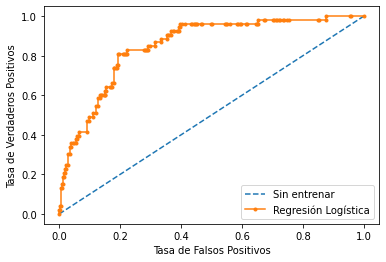

In [16]:
print('Sin entrenar: ROC AUC=%.3f' % (vt0_auc))
print('Regresión Logística: ROC AUC=%.3f' % (vt1_auc))

pyplot.plot(vt0_fpr, vt0_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(vt1_fpr, vt1_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

En la gráfica se puede observar en el modelo sin entrenar se obtuvo un AUC = 0.5, mientras que en el modelo con regresión logística se obtiene un AUC = 0.853, es decir, el modelo con regresión logística tiene un rendimiento más alto que el modelo sin entrenar.

Ahora, haremos la matriz de confusión, la cual sus columnas estan definidas como:
$$\begin{bmatrix}VP&FP\\ FN&VN\end{bmatrix}$$

donde 
VP es equivalente a los verdaderos positivos, FP los falsos positivos, FN los falsos negativos y los VN los verdaderos negativos.

Para hallar esta matriz, se utiliza el comando `confusion_matriz` que tiene como parámetros el conjunto que se tiene con su predicción, dando como resultado la matriz de confusion que se desea

In [31]:
y_true = y_test
confusion_matrix(y_true, y_pred)

array([[455,  20],
       [ 20,  33]], dtype=int64)

Gracias a está matriz de confusión, podemos ver que el algoritmo tiene una eficacia alta dado que su número de falsos positivos y falsos negativos es relativamente alta, pero también se puede notar que tiene una inclinación alta hacia los verdaderos positivos, lo cual hace que el algoritmo se incline en su mayoria a mejorar esto y empeorando la eficacia hacia el cálculo de verdaderos negativos.

Por último, analizaremos los intervalos de confianza. Por medio del método bootstap se puede estimar el comportamiento del modelo, ciertas propiedades importantes como lo son la distribución de los errores, entre otros.

In [56]:
data1 = (y_pred,)


rng = np.random.default_rng()
res = bootstrap(data1, np.std, confidence_level=0.9, random_state=rng)

print(res.confidence_interval)
print("El error estandar es: ")
print(res.standard_error)

ConfidenceInterval(low=0.267622415627296, high=0.3263736246748184)
El error estandar es: 
0.017372718408640846


El intervalo de confianza que dió para la primera predicción (predicción vino tinto) esta entre 0.27 y 0.326, lo que significa que la predicción se encuentra entre esos valores. Además el error estandar es casi cero, por lo tanto, se puede deducir que el clasificador es bastante óptimo.


### Vino Blanco

De la misma manera se realiza con el dataset de `Vino Blanco`

In [12]:
model2 = RandomForestClassifier(random_state=1)
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       963
           1       0.76      0.53      0.63       262

    accuracy                           0.86      1225
   macro avg       0.82      0.74      0.77      1225
weighted avg       0.86      0.86      0.85      1225



Al igual que con el vino tinto, inicialmente se obtienen las probabilidades de que el vino blanco sea clase 1. La variable `vb1_probs` es equivalente a las probabilidades de que el vino blanco sea clase 1 (bueno) y `vb0_probs` es una matriz de ceros para generar un clasificador sin entrenar y así poder comparar al final.

In [17]:
vb0_probs2 = [0 for _ in range(len(y2_test))]
modelLog2 = LogisticRegression(solver='lbfgs')
modelLog2.fit(X2_train, y2_train)
vb1_probs2 = modelLog2.predict_proba(X2_test)
vb1_probs2 = vb1_probs2[:, 1]


Se calcula el AUC para la clase 1 y para el modelo sin entrenar. La variable `vb0_auc` encuentra el área bajo la curva del modelo sin entrenar, mientras que `vb1_auc` halla el área bajo la curva del modelo entrenado. Para ambos casos se utilizó la función `roc_auc_score` que recibe como parámetros el conjunto a entrenar y las probabilidades obtenidas del modelo para la clase 1, y devuelve como resultado el valor AUC respectivo.

In [18]:
vb0_auc2 = roc_auc_score(y2_test, vb0_probs2)
vb1_auc2 = roc_auc_score(y2_test, vb1_probs2)

Para finalizar, se calculan la curvas ROC tanto para el modelo sin entrenar como para el modelo entrenado. Para esto, se utilizó la función roc_curve, que recibe como parámetros el conjunto a entrenar y las probabilidades obtenidas del modelo para la clase 1. Retorna la tasa de falsos positivos y la de verdaderos positivos para el vino blanco.

In [19]:
vb0_fpr2, vb0_tpr2, _ = roc_curve(y2_test, vb0_probs2)
vb1_fpr2, vb1_tpr2, _ = roc_curve(y2_test, vb1_probs2)

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.781


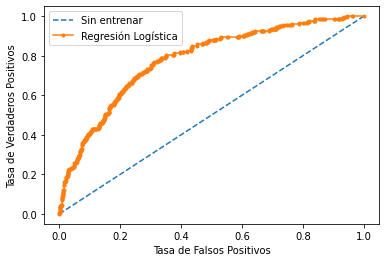

In [20]:
print('Sin entrenar: ROC AUC=%.3f' % (vb0_auc2))
print('Regresión Logística: ROC AUC=%.3f' % (vb1_auc2))

# Pintamos las curvas ROC
pyplot.plot(vb0_fpr2, vb0_tpr2, linestyle='--', label='Sin entrenar')
pyplot.plot(vb1_fpr2, vb1_tpr2, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()


Tal comose evidencio anteriormente, el AUC del modelo con regresón logística es mayor que el AUC del modelo sin entrenar (0.781 > 0.5), por lo tanto, el modelo con regresión logística tiene un rendimiento notablemente mayor.

De la misma manera, como explicamos anteriormente, obtenemos la matriz de confusión. El resultado fue el siguiente

In [32]:
y_true2 = y2_test
confusion_matrix(y_true2, y2_pred)

array([[918,  45],
       [122, 140]], dtype=int64)

Gracias a está matriz de confusión, podemos ver que el algoritmo tiene una eficacia alta dado que su número de falsos positivos y falsos negativos es relativamente alta, pero también se puede notar que tiene una inclinación alta hacia los verdaderos positivos, lo cual hace que el algoritmo se incline en su mayoria a mejorar esto y empeorando la eficacia hacia el cálculo de verdaderos negativos.

Por medio del método bootstap se puede estimar el comportamiento del modelo, ciertas propiedades importantes como lo son los intervalos de confianza, la distribución de los errores, entre otros.

In [55]:
data2 = (y2_pred,)


rng = np.random.default_rng()
res = bootstrap(data2, np.std, confidence_level=0.9, random_state=rng)

print(res.confidence_interval)

print("El error estandar es: ")
print(res.standard_error)

ConfidenceInterval(low=0.34052070767162773, high=0.3740112050563527)
El error estandar es: 
0.010078161586683593


El intervalo de confianza que dio para la segunda predicción (predicción vino blanco) esta entre 0.34 y 0.373, lo que significa que la predicción se encuentra entre esos valores. Además el error estandar es casi cero, por lo tanto, se puede deducir que el clasificador es bastante óptimo.


## K-nearest neighbor

Ahora bien, se decidió implementar el clasificador por medio del modelo de K-NN. El resultado fue el sigueinte.

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

### Vino Rojo

Se entrena el modelo, de manera que se pueda clasificar con el sistema. Sin emabargo, se utilizará el mismo sistema de entrenamiento anteriormente. Es decir, `X_train`, `y_train`, `X_test` y `y_test`.

In [48]:
scalerKNN = MinMaxScaler()
X_trainKNN = scaler.fit_transform(X_train)
X_testKNN = scaler.transform(X_test)

In [49]:
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_trainKNN, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_trainKNN, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_testKNN, y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.88


In [50]:
pred = knn.predict(X_testKNN)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[441  34]
 [ 32  21]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       475
           1       0.38      0.40      0.39        53

    accuracy                           0.88       528
   macro avg       0.66      0.66      0.66       528
weighted avg       0.88      0.88      0.88       528



### Vino Blanco

In [52]:
scalerKNN2 = MinMaxScaler()
X_trainKNN2 = scaler.fit_transform(X2_train)
X_testKNN2 = scaler.transform(X2_test)

In [53]:

knn2 = KNeighborsClassifier(n_neighbors)
knn2.fit(X_trainKNN2, y2_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn2.score(X_trainKNN2, y2_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn2.score(X_testKNN2, y2_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.80


In [54]:
pred2 = knn2.predict(X_testKNN2)
print(confusion_matrix(y2_test, pred2))
print(classification_report(y2_test, pred2))

[[860 103]
 [139 123]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       963
           1       0.54      0.47      0.50       262

    accuracy                           0.80      1225
   macro avg       0.70      0.68      0.69      1225
weighted avg       0.79      0.80      0.80      1225



## Preguntas

1. ¿En prueba se comporta igual para todas las clases? ¿Si no se comporta igual esto a que se debe?
    - No se comportan de la misma manera, debido a que los datos son diferentes en ambos casos. Por ende, valores como el accuracy y recall son diferentes al momento de hacer la predicción, gracias a esta predicción se pudo notar que el algoritmo actuaba mejor con la base de datos de vino tinto tanto para los bosques aleatorios como para el K-Nearest Neighbor.


2.  Discusión sobre que información pueden obtener a partir de los resultados que entrega el modelo. (¿que varaibles son más importantes? ¿Cuando funciona mejor/peor?, etc..)
    - La discusión y el análisis de la información se hace a lo largo de cada definición de cada metodo. Además, como se dijo anteriormente a lo largo del documento, el AUC (área bajo la curva), es muy importante al momento de saber que tan bueno es un clasificador y también al momento de realizar la curva de ROC, con la cual, gráficamente se puede notar la eficacia de cada clasificador. Otra herramienta importante es la matriz de confusión, en la cual se puede analizar los falsos positivos, los falsos negativos, los verdaderos positivos y los verdaderos nagativos que son arrojados por el modelo. 

3. Discusión a fondo del comportamiento de los modelos encontrados, posibles fallas, posibles mejoras.
    - En este notebook se realizaron dos modelos, arboles aleatorios y k-Nearest Neighbor, con base en los resultados obtenidos, se pudo notar que el modelos de bosques aleatorios era más preciso, debido a que al momento de comparar valores como accuracy y recall, los valores en el algoritmo K-Nearest Neighbor eran más pequeños. Además, al momento de comparar las matrices de correlación de vino tinto y vino blanco en ambos modelos, se pudo notar que las entradas que corresponden a los falsos positivos y falsos negativos tomaban valores más altos al momento de hacer el algoritmo de K-Nearest Neighbor. El mdelo podría mejorar al momento de calcular los verdaderos negativos, para así hacer que el modelo de clasificación sea más completo.